## Neural Network

This is working now for valid_data. Change this to the correct dataset later then add more samples to this row later:

shap_samples = shap.sample(valid_data_x, 10)

In [37]:
# Load and combine datasets
import pandas as pd
from scipy.sparse import load_npz
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
import pickle

valid_data_x_sparse = load_npz('valid_data_x_sparse.npz')
valid_data_x_dense = pd.read_csv('valid_data_x_dense.csv')
valid_data_y = pd.read_csv('valid_data_y.csv')

with open('sparse_matrices_feature_names.pkl', 'rb') as f:
    sparse_matrices_feature_names = pickle.load(f)

valid_data_x = hstack([valid_data_x_sparse, csr_matrix(valid_data_x_dense.values)]).toarray()
valid_data_x.shape

(1679, 5017)

In [38]:
# Use sklearn neural network to train the model¨
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

scores = cross_val_score(clf, valid_data_x, valid_data_y.values.ravel(), cv=5)
print(scores)

Iteration 1, loss = 0.56838143
Iteration 2, loss = 0.53769489
Iteration 3, loss = 0.52181974
Iteration 4, loss = 0.51845723
Iteration 5, loss = 0.51555104
Iteration 6, loss = 0.51239965
Iteration 7, loss = 0.50895769
Iteration 8, loss = 0.50599325
Iteration 9, loss = 0.50170279
Iteration 10, loss = 0.49709197
Iteration 11, loss = 0.49319630
Iteration 12, loss = 0.48658796
Iteration 13, loss = 0.48030429
Iteration 14, loss = 0.47572713
Iteration 15, loss = 0.47053857
Iteration 16, loss = 0.46265623
Iteration 17, loss = 0.45673081
Iteration 18, loss = 0.45017525
Iteration 19, loss = 0.44309507
Iteration 20, loss = 0.43872492
Iteration 21, loss = 0.43035841
Iteration 22, loss = 0.42312669
Iteration 23, loss = 0.41612912
Iteration 24, loss = 0.41229791
Iteration 25, loss = 0.40092858
Iteration 26, loss = 0.39337485
Iteration 27, loss = 0.39725781
Iteration 28, loss = 0.37544544
Iteration 29, loss = 0.36402901
Iteration 30, loss = 0.36130969
Iteration 31, loss = 0.34634222
Iteration 32, los

Iteration 1, loss = 0.57384651
Iteration 2, loss = 0.52356491
Iteration 3, loss = 0.51996057
Iteration 4, loss = 0.51748463
Iteration 5, loss = 0.51496196
Iteration 6, loss = 0.51198456
Iteration 7, loss = 0.50895601
Iteration 8, loss = 0.50463905
Iteration 9, loss = 0.50054335
Iteration 10, loss = 0.49485785
Iteration 11, loss = 0.48868482
Iteration 12, loss = 0.48370676
Iteration 13, loss = 0.47744937
Iteration 14, loss = 0.47082139
Iteration 15, loss = 0.46611478
Iteration 16, loss = 0.46088222
Iteration 17, loss = 0.45091421
Iteration 18, loss = 0.44593178
Iteration 19, loss = 0.43719986
Iteration 20, loss = 0.42962104
Iteration 21, loss = 0.42217837
Iteration 22, loss = 0.41575727
Iteration 23, loss = 0.40981053
Iteration 24, loss = 0.40525264
Iteration 25, loss = 0.38752118
Iteration 26, loss = 0.37910597
Iteration 27, loss = 0.37066795
Iteration 28, loss = 0.36045421
Iteration 29, loss = 0.34870780
Iteration 30, loss = 0.33843994
Iteration 31, loss = 0.34153965
Iteration 32, los

100%|██████████| 10/10 [01:03<00:00,  6.40s/it]


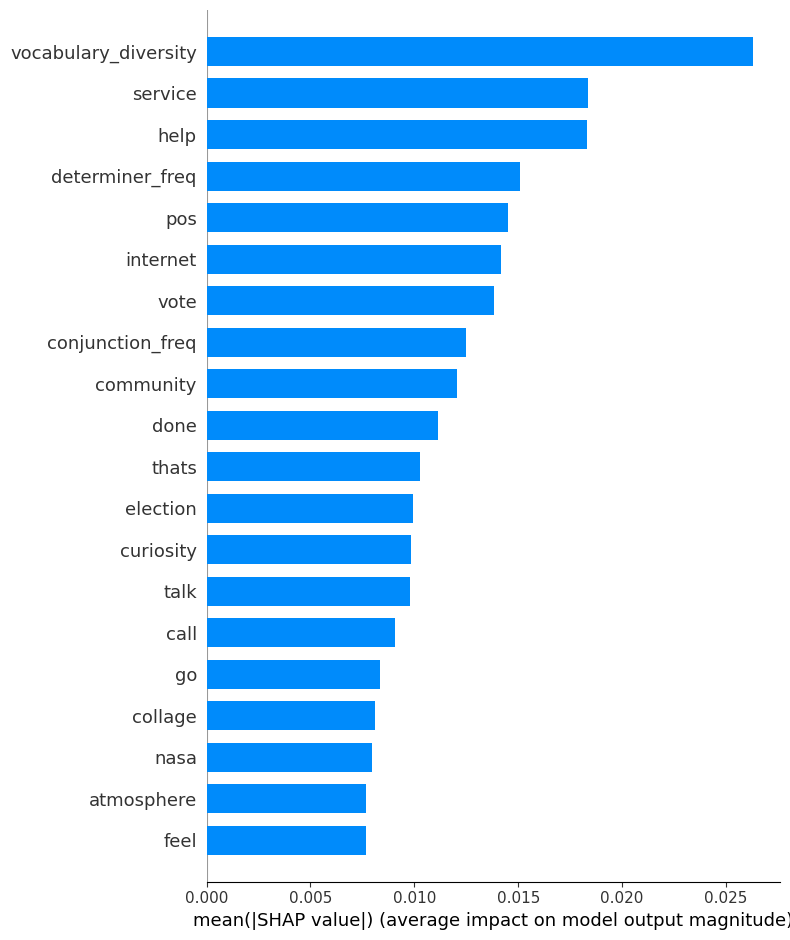

In [39]:
# Use Shap to explain the model
import shap

clf.fit(valid_data_x, valid_data_y.values.ravel())

shap_samples = shap.sample(valid_data_x, 10)
explainer = shap.KernelExplainer(clf.predict, shap_samples)

shap_values = explainer.shap_values(shap_samples, num_workers=8)

feature_names=list(sparse_matrices_feature_names) + list(valid_data_x_dense.columns)
shap.summary_plot(shap_values, features=valid_data_x, plot_type='bar', feature_names=feature_names)